<a href="https://colab.research.google.com/github/LazyRook01/NLP/blob/main/Patil's_Senti_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the dataset

In [20]:
import os

# Upload the kaggle.json file if you are using Google Colab
from google.colab import files
files.upload()

# Move the kaggle.json file to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set appropriate permissions
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d abhi8923shriv/sentiment-analysis-dataset

# Unzip the downloaded dataset
!unzip sentiment-analysis-dataset.zip

# List the files in the current directory
!ls


Saving kaggle.json to kaggle.json
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 70, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1493, in dataset_download_cli
    self.dataset_download_files(dataset,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1447, in dataset_download_files
    self.download_file(response, outfile, quiet, not force)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1834, in download_file
    size = int(response.headers['Content-Length'])
  File "/usr/local/lib/python3.10/dist-packages/urllib3/_collections.py", line 258, in __getitem__
    val = self._container[key.lower()]
KeyError: 'content-length'
Archive:  sentiment-analysis-dataset.zip
replace test.csv? [y]es, [n]o, 

In [75]:
import pandas as pd

# Load the dataset with explicit encoding
df_train = pd.read_csv('train.csv', encoding='latin-1')
df_test = pd.read_csv('test.csv', encoding='latin-1')

In [76]:
df_train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [79]:
# List of unimportant columns to drop
columns_to_drop = ['textID', 'Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']

# Filter out columns that exist in both DataFrames
columns_to_drop = [col for col in columns_to_drop if col.strip() in df_train.columns and col.strip() in df_test.columns]

# Drop unimportant columns from df_test
df_train = df_train.drop(columns=columns_to_drop, errors='ignore')

# Drop unimportant columns from df_test
df_test = df_test.drop(columns=columns_to_drop, errors='ignore')


In [80]:
df_test.columns

Index(['text', 'sentiment'], dtype='object')

In [81]:
df_test

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
...,...,...
4810,NaN,NaN
4811,NaN,NaN
4812,NaN,NaN
4813,NaN,NaN


In [82]:
# Check for missing values in df_train
missing_values_train = df_train.isnull().sum()

# Check for missing values in df_test
missing_values_test = df_test.isnull().sum()

# Display the missing values counts
print("Missing Values in df_train:")
print(missing_values_train)

print("\nMissing Values in df_test:")
print(missing_values_test)


Missing Values in df_train:
text             1
selected_text    1
sentiment        0
dtype: int64

Missing Values in df_test:
text         1281
sentiment    1281
dtype: int64


In [83]:
df_train.shape

(27481, 3)

In [84]:
df_test.shape

(4815, 2)

In [85]:
# Drop rows with missing values from df_train for the specified columns
df_train = df_train.dropna()

# Drop rows with missing values from df_test for the specified columns
df_test = df_test.dropna()

In [86]:
# Check for missing values in df_train
missing_values_train = df_train.isnull().sum()

# Check for missing values in df_test
missing_values_test = df_test.isnull().sum()

# Display the missing values counts
print("Missing Values in df_train:")
print(missing_values_train)

print("\nMissing Values in df_test:")
print(missing_values_test)


Missing Values in df_train:
text             0
selected_text    0
sentiment        0
dtype: int64

Missing Values in df_test:
text         0
sentiment    0
dtype: int64


In [87]:
df_train.columns

Index(['text', 'selected_text', 'sentiment'], dtype='object')

In [88]:
# Drop 'selected_text' from df_train
df_train = df_train.drop(columns=['selected_text'], errors='ignore')

In [89]:
df_train.columns

Index(['text', 'sentiment'], dtype='object')

In [90]:
df_train['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='Count'>

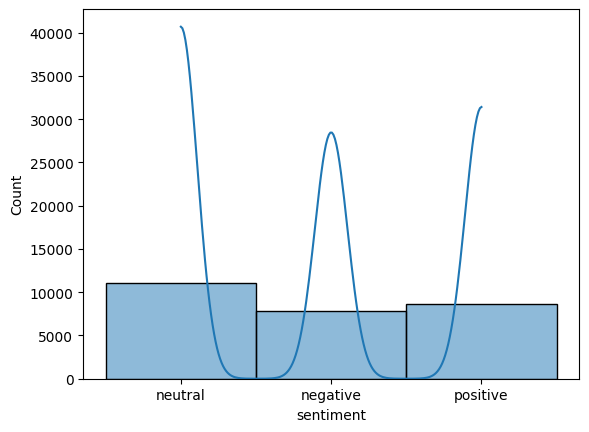

In [91]:
import seaborn as sns
sns.histplot(df_train['sentiment'], kde=True)

In [92]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a single string
    processed_text = ' '.join(words)

    return processed_text

# Apply text preprocessing to 'text' column in df_train
df_train['text'] = df_train['text'].apply(preprocess_text)

# Apply text preprocessing to 'text' column in df_test
df_test['text'] = df_test['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-92-be3cfb72b035>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text'] = df_test['text'].apply(preprocess_text)


In [93]:
df_train

,text,sentiment
0,"` respond , go",neutral
1,sooo sad miss san diego ! ! !,negative
2,boss bulli ...,negative
3,interview ! leav alon,negative
4,"son * * * * , ` put releas alreadi bought",negative
...,...,...
27476,wish could come see u denver husband lost job ...,negative
27477,"` wonder rake . client made clear .net , ` for...",negative
27478,yay good . enjoy break - probabl need hectic w...,positive
27479,worth * * * * .,positive


In [95]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['sentiment'], test_size=0.2, random_state=42)

# Create a pipeline with TfidfVectorizer and MultinomialNB
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.6140829694323144
Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.40      0.52      1572
     neutral       0.54      0.81      0.64      2236
    positive       0.73      0.56      0.63      1688

    accuracy                           0.61      5496
   macro avg       0.67      0.59      0.60      5496
weighted avg       0.66      0.61      0.61      5496



In [96]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['sentiment'], test_size=0.2, random_state=42)

# Define a list of classifiers
classifiers = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVM': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

# Iterate over classifiers and evaluate performance
for name, classifier in classifiers.items():
    model = make_pipeline(TfidfVectorizer(), classifier)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", classification_rep)


Classifier: MultinomialNB
Accuracy: 0.6140829694323144
Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.40      0.52      1572
     neutral       0.54      0.81      0.64      2236
    positive       0.73      0.56      0.63      1688

    accuracy                           0.61      5496
   macro avg       0.67      0.59      0.60      5496
weighted avg       0.66      0.61      0.61      5496



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classifier: LogisticRegression
Accuracy: 0.6814046579330422
Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.57      0.63      1572
     neutral       0.62      0.74      0.68      2236
    positive       0.76      0.70      0.73      1688

    accuracy                           0.68      5496
   macro avg       0.70      0.67      0.68      5496
weighted avg       0.69      0.68      0.68      5496


Classifier: RandomForestClassifier
Accuracy: 0.7054221251819505
Classification Report:
               precision    recall  f1-score   support

    negative       0.74      0.59      0.66      1572
     neutral       0.66      0.73      0.70      2236
    positive       0.74      0.78      0.76      1688

    accuracy                           0.71      5496
   macro avg       0.71      0.70      0.70      5496
weighted avg       0.71      0.71      0.70      5496


Classifier: SVM
Accuracy: 0.6946870451237264
Classification Rep